In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
PATH = 'C:/Workspace/python/Data_Science/dataA/ProDS특강/'
file_list = os.listdir(PATH)
print(file_list)

['Dataset.zip', 'Dataset_01.csv', 'Dataset_02.csv', 'Dataset_03.csv', 'Dataset_04.csv', 'Dataset_05.csv', 'Dataset_05_item_list.csv', 'Dataset_05_Mart_POS.csv', 'Dataset_06.csv', 'Dataset_07.csv', 'Dataset_08.csv', 'Dataset_09.csv', 'Dataset_10.csv', 'Dataset_11.csv', 'Dataset_12.csv', 'Dataset_13_test.csv', 'Dataset_13_train.csv', 'Dataset_14.csv', 'Dataset_15_item_list.csv', 'Dataset_15_Mart_POS.csv']


In [3]:
df_02 = pd.read_csv(PATH + file_list[2])
df_02.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [39]:
# 피벗 테이블 사용 예시
# pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
#                      index = 'class',    # 행 위치에 들어갈 열
#                      columns = 'sex',    # 열 위치에 들어갈 열
#                      values = 'age',     # 데이터로 사용할 열
#                      aggfunc = 'mean')   # 데이터 집계함수
df_02.pivot_table('Age', 'BP', 'Cholesterol') # values, index, columns순
pd.pivot_table(df_02, index = 'BP', columns = 'Cholesterol', values = 'Age')

Cholesterol,HIGH,NORMAL
BP,,
HIGH,46.428571,38.738095
LOW,47.032258,47.030303
NORMAL,43.081081,45.772727


In [41]:
pd.crosstab(df_02.BP, columns = df_02.Cholesterol, values = df_02.Age, aggfunc = 'mean')

Cholesterol,HIGH,NORMAL
BP,,
HIGH,46.428571,38.738095
LOW,47.032258,47.030303
NORMAL,43.081081,45.772727


In [62]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

# 크로스탭 사용예시
# pd.crosstab(index=[df_phone.month, df_phone.item], 
#                    columns=df_phone.network, values=df_phone.duration, aggfunc='sum' ).fillna(0)
q1 = pd.crosstab(index=[df_02.Sex, df_02.BP],
               columns=[df_02.Cholesterol], normalize=True, margins = True)
q1.loc[('F', 'HIGH'), 'NORMAL']
# df_02[['Sex','BP','Cholesterol']].value_counts(normalize=True)

0.105

In [35]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================
from scipy.stats import chi2_contingency
q2 = df_02.copy()
q2['Age_gr'] = np.where(q2.Age < 20, '10', np.where(q2.Age < 30, '20', np.where(q2.Age < 40, '30', \
               np.where(q2.Age < 50, '40', np.where(q2.Age < 60, '50', '60')))))
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1', np.where(q2.Na_to_K <= 20, 'Lv2', np.where(q2.Na_to_K <= 30, 'Lv3', 'Lv4')))
x_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']
result_dict = dict()
result_list = []
for x in x_list:
    temp = pd.crosstab(index=q2[x], columns=q2['Drug'])
    chi2 = chi2_contingency(temp)
    if chi2[1] < 0.05:
        result_dict[x] = chi2[1]
        result_list.append(chi2[1])
len(result_list), np.floor(max(result_list) * 10**5) / 10**5
# (2.119248418109203,  # chi2 통계량
#  0.7138369773987128, # p-value, 결론: 독립이다
#  4, # 자유도, (r-1)(c-1)
#  array([[43.68, 11.04,  7.68,  7.68, 25.92],
#         [47.32, 11.96,  8.32,  8.32, 28.08]])) # 독립인 경우 기대빈도

(4, 0.0007)

|--- Na_to_K <= 14.82850
|   |--- BP_cd <= 1.50000
|   |   |--- BP_cd <= 0.50000
|   |   |   |--- truncated branch of depth 2
|   |   |--- BP_cd >  0.50000
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.50000
|   |   |--- Age <= 50.50000
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50000
|   |   |   |--- class: drugB
|--- Na_to_K >  14.82850
|   |--- class: DrugY



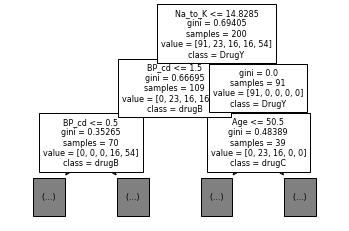

In [57]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

q3 = df_02.copy()
q3['Sex_cd'] = np.where(q3.Sex == 'M', 0 ,1)
q3['BP_cd'] = np.where(q3.BP == 'LOW', 0, np.where(q3.BP == 'NORMAL', 1, 2))
q3['Ch_cd'] = np.where(q3.Cholesterol == 'NORMAL', 0, 1)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
x_list=['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']
y_label=list(q3.Drug.unique())
dt = DecisionTreeClassifier().fit(q3[x_list], q3.Drug)
plot_tree(dt, max_depth=2,
          feature_names=x_list,
          class_names=y_label,
          precision=5,
          fontsize=8)


print(export_text(dt, max_depth=2,
            feature_names=x_list,
            decimals=5))